# 第一个程序

样本数据： 100本书对应的页数

标签数据： 每本书对应的价格

$ y = x * kernel + bias $

## 1. 导入包

In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

# 启用eager executing
# tf.enable_eager_execution()

## 2. 准备数据

In [2]:
# 随机生成100个样本数据和标签数据
x_samples = np.random.randint(100, 500, 100) # 随机生成100个0 - 500 之间的整数,分别表示每本书的页数
y_samples = [x * 0.1 + 2 + np.random.sample() * 10 for x in x_samples] # 根据页数计算价格，带上误差, 近似公式 y = x * 0.1 + 2.5

# 准备训练数据 80个， 利用Pyhton切片功能
x_train = np.asarray(x_samples[:80])
y_train = np.asarray(y_samples[:80])

# 准备验证数据 10个， 利用Pyhton切片功能
x_val = np.asarray(x_samples[80:90])
y_val = np.asarray(y_samples[80:90])

# 准备测试数据 10个， 利用Pyhton切片功能
x_test = np.asarray(x_samples[90:])
y_test = np.asarray(y_samples[90:])

## 3. 看一下数据

将训练数据以<font color="blue">蓝点</font>显示在图中

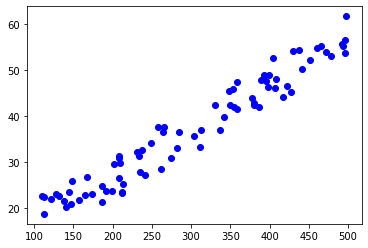

In [3]:
plt.figure()
plt.plot(x_train, y_train, 'bo')
plt.show()

## 4. 构建模型

In [4]:
# 定义一个顺序模型
model = tf.keras.models.Sequential()
# 添加一层
model.add(tf.keras.layers.Dense(1, input_shape=(1,), name="layer_1"))
# 显示模型概要
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


## 5. 编译模型

In [5]:
model.compile(
    # 优化器
    optimizer=tf.keras.optimizers.RMSprop(0.001),
    # 损失函数
    loss=tf.keras.losses.mean_squared_error
)

## 6. 训练模型

In [ ]:
model.fit(
    # 样本数据
    x_train, 
    # 标签数据
    y_train,
    # 验证数据
    validation_data=(x_val, y_val),
    # 迭代次数
    epochs=1000,
    # 由于需要迭代1000，次这边直接隐藏了训练进度数据
    verbose=0
)

## 7. 评估模型

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

## 8. 使用模型

> 将测试数据用<font color="blue">蓝点</font>显示在图中, 将推断数据以<font color="red">红点</font>显示在图中


In [ ]:
predictions = model.predict(x_test)
plt.figure()

plt.plot(x_test, y_test, 'bo')

plt.plot(x_test, [pred[0] for pred in predictions], 'ro')
plt.legend(['original', 'predictions'])
plt.show()

# print(model.get_layer(index=0).variables)

## 9. 训练过程

训练过程就是不断调整 `W` 和`b` 的值，使得 `loss` 值最小，这个过程称之为 __拟合__

<img src="./images/book.gif" />